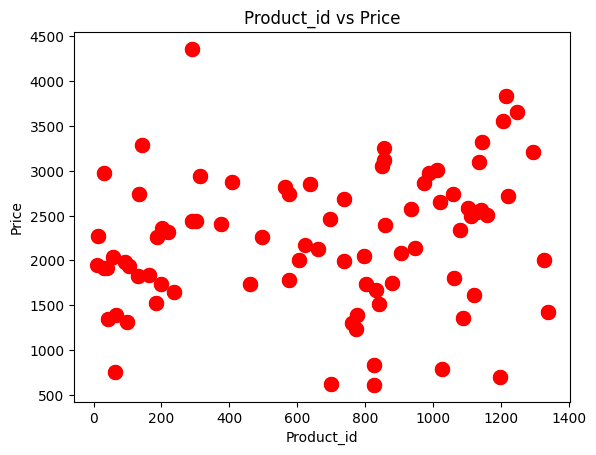

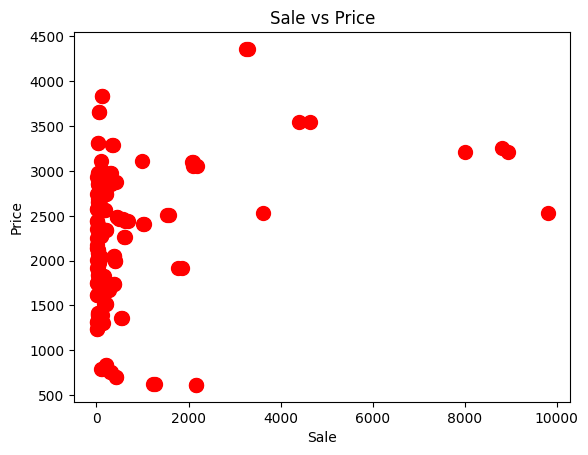

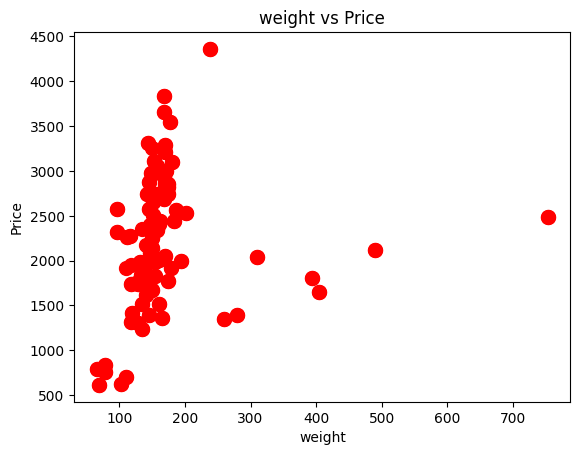

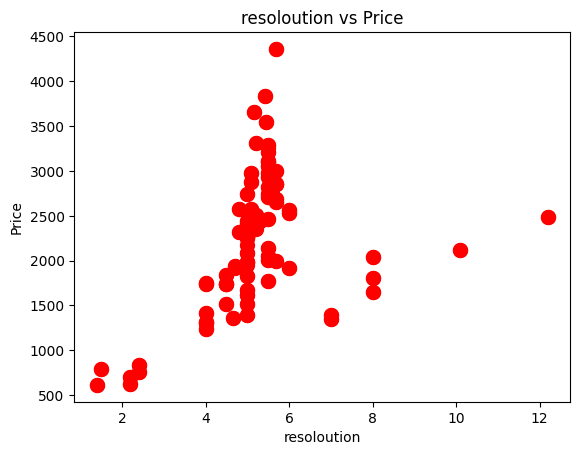

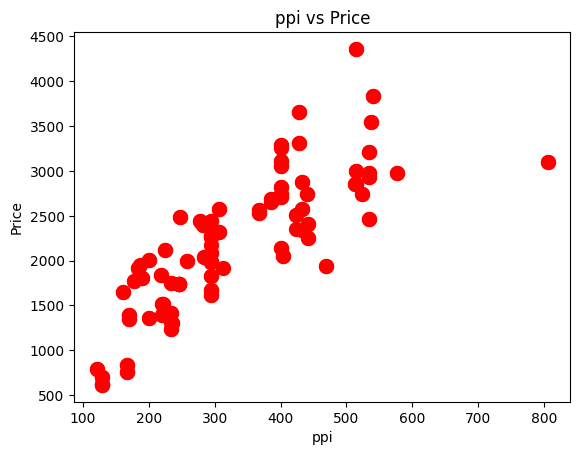

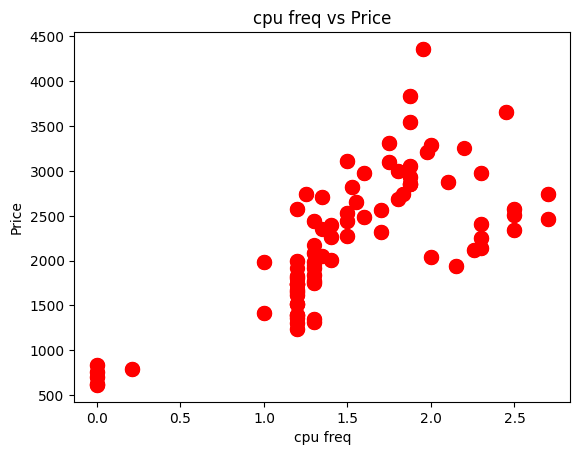

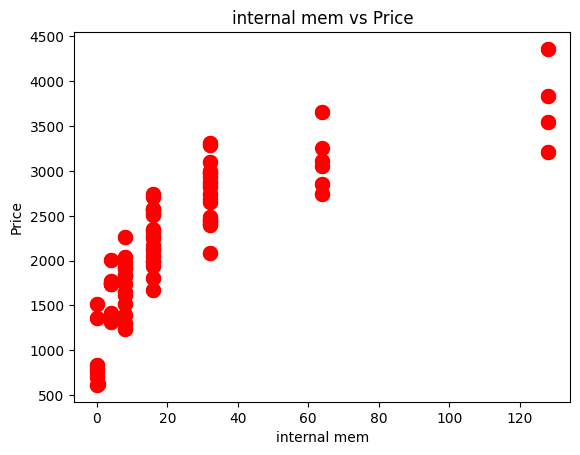

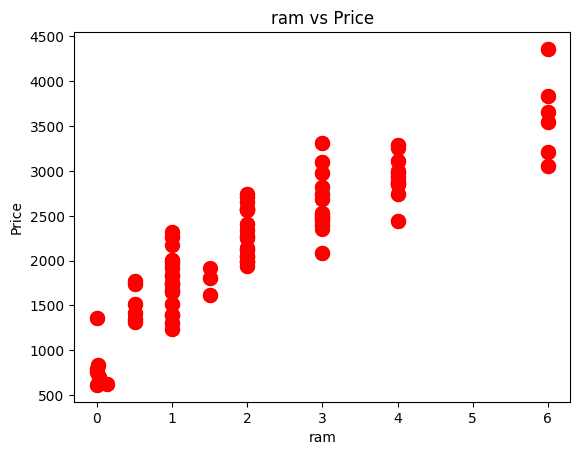

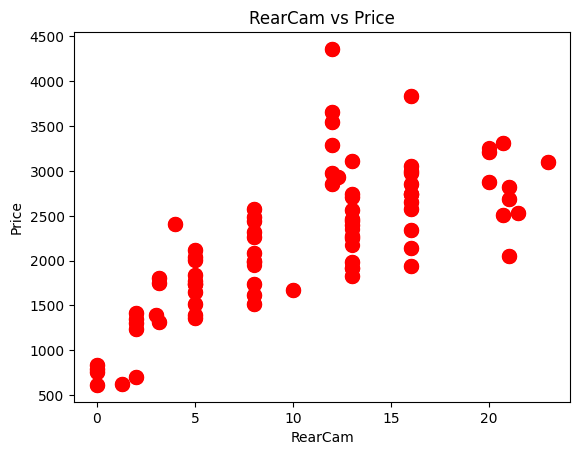

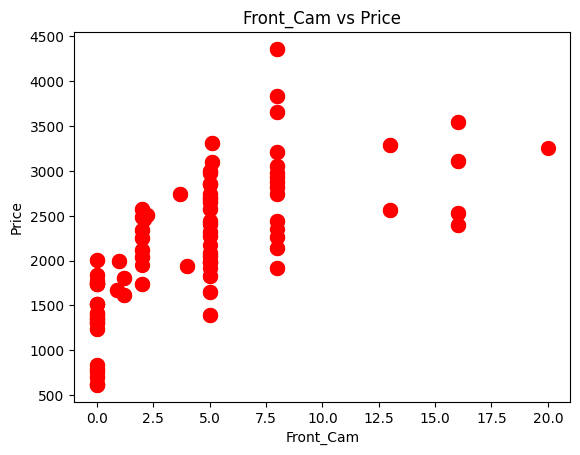

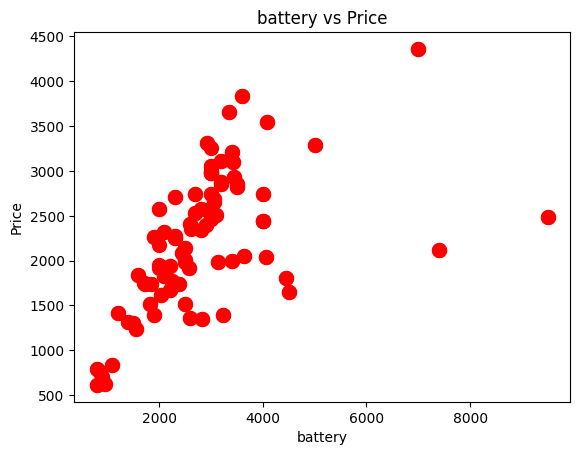

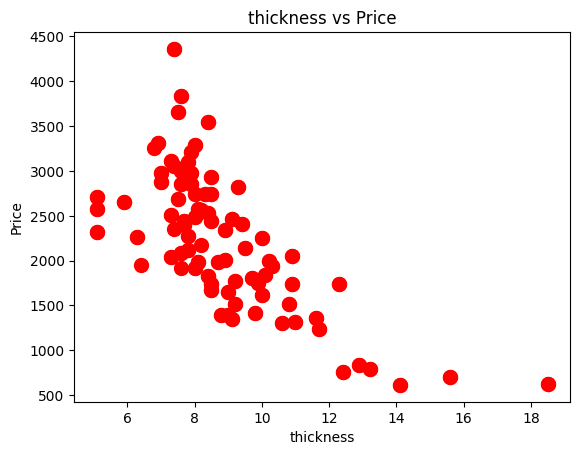

y = 1434.61712 + 93.32828 * Product_id + -249.50115 * Sale + -731.18664 * weight + -777.87822 * resoloution + 711.63465 * ppi + 449.69240 * cpu core + 386.08914 * cpu freq + 822.65640 * internal mem + 508.56633 * ram + -26.79640 * RearCam + 151.74086 * Front_Cam + 1438.23645 * battery + -1042.34432 * thickness
Mean Squared Error: 28947.31450052959
Mean Absolute Error: 139.04294987456774
Root Mean Squared Error: 170.1391033846411


In [49]:
#2203A52126 CAPSTON PROJECT STAT ML WITH LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

data = pd.read_csv('/content/Cellphone.csv')

data.fillna(data.mean(), inplace=True)

features = data.drop('Price', axis=1)
target = data['Price']


numerical_features = [
    'Product_id', 'Sale', 'weight', 'resoloution', 'ppi',
    'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
    'battery', 'thickness'
]


for feature in numerical_features:
    plt.scatter(features[feature], target,c='red',s=100)
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'{feature} vs Price')
    plt.show()


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=13)


lr = LinearRegression()
lr.fit(X_train, y_train)


coef = lr.coef_
intercept = lr.intercept_


y_pred = np.dot(features_scaled, coef) + intercept



equation = f'y = {intercept:.5f}'
for feature, coeff in zip(features.columns, coef):
    equation += f' + {coeff:.5f} * {feature}'
print(equation)


y_pred = lr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

In [48]:
#2203A52126 CAPSTON PROJECT STAT ML WITH SVM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error


data = pd.read_csv('/content/Cellphone.csv')

data.fillna(data.mean(), inplace=True)

features = data.drop('Price', axis=1)
target = data['Price']


scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)


X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.3, random_state=23)


svr = SVR(kernel='rbf')  #kernels = 'linear', 'rbf', 'poly'.


svr.fit(X_train, y_train)


y_pred = svr.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")



mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")



rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 622464.9971159775
Mean Absolute Error: 648.9136463241946
Root Mean Squared Error: 788.9645094146995
